### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# from sklearn.preprocessing

### Import Dataset

In [2]:
rawData = pd.read_csv('/content/forestfires.csv')
rawData.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


### Check for null values and shape of the dataset

In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

### importing and scale down the data

In [5]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [6]:
Mscaler = MinMaxScaler() # initiating minmaxscaler

### building the pair plot to check the correlation between the data to predict the size_category

In [7]:
sns.pairplot(pd.concat([pd.DataFrame(Mscaler.fit_transform(rawData.iloc[:,2:11]),columns=rawData.columns[2:11])
                        ,rawData.size_category],axis=1,),hue='size_category')

In [8]:
# pd.concat([pd.DataFrame(Mscaler.fit_transform(rawData.iloc[:,2:11]),columns=rawData.columns[2:11]),rawData.size_category],axis=1,)

### The best input features to predict the size_category are Rain and the Area

    Plot below reiterates the same.

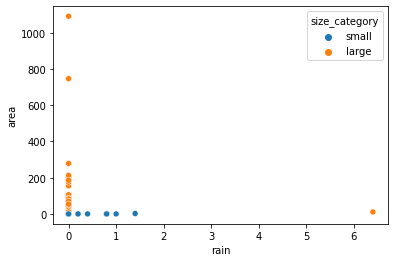

In [9]:
sns.scatterplot(x = rawData.rain, y = rawData.area, hue= rawData.size_category)

### Importing the keras library

In [10]:
from keras.models import Sequential
from keras.layers import Dense

### Defining our X and Y for the model

In [11]:
X = pd.DataFrame(Mscaler.fit_transform(rawData.iloc[:,9:11]),columns=rawData.columns[9:11])  ## X input data
X

,rain,area
0,0.00000,0.000000
1,0.00000,0.000000
2,0.00000,0.000000
3,0.03125,0.000000
4,0.00000,0.000000
...,...,...
512,0.00000,0.005904
513,0.00000,0.049769
514,0.00000,0.010231
515,0.00000,0.000000


In [12]:
X.info() # Checking the data integrity for prediction

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rain    517 non-null    float64
 1   area    517 non-null    float64
dtypes: float64(2)
memory usage: 8.2 KB


In [13]:
y = rawData.size_category.copy()  # y our predicted / fitted values
y

0      small
1      small
2      small
3      small
4      small
       ...  
512    large
513    large
514    large
515    small
516    small
Name: size_category, Length: 517, dtype: object

In [15]:
y = y.map({'small':0,'large':1})  ## Changing the string values to numeric values. Binary encoding as there only two classes

### Converting the data into ndarray

In [16]:
X = np.array(X)
y = np.array(y)
type(X),type(y)

(numpy.ndarray, numpy.ndarray)

In [17]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,

### Initiate the sequential model

In [18]:
model = Sequential()
model.add(Dense(8, input_dim=2,  activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Compile the model with evaluation parameters

In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fit the data on the model

In [20]:
model.fit(X, y, validation_split=0.33, epochs=250, batch_size=20)

Epoch 1/250
18/18 [==============================] - 15s 29ms/step - loss: 0.6920 - accuracy: 0.7465 - val_loss: 0.6896 - val_accuracy: 0.6784
Epoch 2/250
18/18 [==============================] - 0s 4ms/step - loss: 0.6868 - accuracy: 0.7518 - val_loss: 0.6859 - val_accuracy: 0.6784
Epoch 3/250
18/18 [==============================] - 0s 4ms/step - loss: 0.6826 - accuracy: 0.7294 - val_loss: 0.6824 - val_accuracy: 0.6784
Epoch 4/250
18/18 [==============================] - 0s 4ms/step - loss: 0.6766 - accuracy: 0.7549 - val_loss: 0.6788 - val_accuracy: 0.6784
Epoch 5/250
18/18 [==============================] - 0s 4ms/step - loss: 0.6728 - accuracy: 0.7375 - val_loss: 0.6753 - val_accuracy: 0.6784
Epoch 6/250
18/18 [==============================] - 0s 4ms/step - loss: 0.6642 - accuracy: 0.7732 - val_loss: 0.6715 - val_accuracy: 0.6784
Epoch 7/250
18/18 [==============================] - 0s 4ms/step - loss: 0.6589 - accuracy: 0.7634 - val_loss: 0.6634 - val_accuracy: 0.6784
Epoch 8/250

### Get the scores using evaluate function

In [21]:
scores = model.evaluate(X, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.1179 - accuracy: 0.9749
accuracy: 97.49%


In [22]:
scores

[0.11792878061532974, 0.9748549461364746]

### Hyperparameter tuning

Neural networks have lots of hyperparameters these are models that can perform differently with different parameters and we need to choose our parameters that most suit the dataset. 

Below we shall use gridsearchCv in combination with Kfold to corss validate the various parameters of the neural networks model.

we build a function to initate the model every time the a new set of parameters to be crossvalidated. and we pass the parameter grid in the form of a dictionary to the function. it will check all the combinations of parameters for us.

In [23]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from keras.layers import Dropout

### Hyperparameter tuning using tanh and relu activation functions

In [24]:
# def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
#     model = Sequential()
#     model.add(Dense(neuron1,input_dim = 2,kernel_initializer = init,activation = activation_function))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(1,activation = activation_function))
    
#     adam = Adam(learning_rate = learning_rate)
#     model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
#     return model

# # Create the model

# model = KerasClassifier(build_fn = create_model,verbose = 0)

# # Define the grid search parameters

# batch_size = [10,20]
# epochs = [50,100]
# learning_rate = [0.01,0.1]
# dropout_rate = [0.0,0.1]
# activation_function = ['relu','tanh']
# init = ['uniform','normal','zero']
# neuron1 = [4,8]
# neuron2 = [4,8]

# # Make a dictionary of the grid search parameters

# param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
#                    activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

# # Build and fit the GridSearchCV

# grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(n_splits=2),verbose = 1,n_jobs=-1)
# grid_result = grid.fit(X,y)

Fitting 2 folds for each of 384 candidates, totalling 768 fits
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4, total=   4.0s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4, total=   3.5s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8, total=   3.6s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8, total=   3.6s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4, total=   3.4s
[CV] activation_functio

[Parallel(n_jobs=1)]: Done 768 out of 768 | elapsed: 52.3min finished


### Get the summary results and get the best parmeters that yield the best results.

In [25]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9961240291595459, using {'activation_function': 'tanh', 'batch_size': 10, 'dropout_rate': 0.1, 'epochs': 100, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 4, 'neuron2': 8}
0.8275941908359528,0.13379576802253723 with: {'activation_function': 'relu', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 50, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 4, 'neuron2': 4}
0.899269700050354,0.0775642991065979 with: {'activation_function': 'relu', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 50, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 4, 'neuron2': 8}
0.7310690879821777,0.03727066516876221 with: {'activation_function': 'relu', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 50, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 8, 'neuron2': 4}
0.7387911081314087,0.044992685317993164 with: {'activation_function': 'relu', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 50, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 8, 'neuron2': 8}
0.7310690879

### Hyperparameter turing using softmax and linear (activation functions)

In [26]:
# def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
#     model = Sequential()
#     model.add(Dense(neuron1,input_dim = 2,kernel_initializer = init,activation = activation_function))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(1,activation = activation_function))
    
#     adam = Adam(learning_rate = learning_rate)
#     model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
#     return model

# # Create the model

# model = KerasClassifier(build_fn = create_model,verbose = 0)

# # Define the grid search parameters

# batch_size = [10,20]
# epochs = [50,100]
# learning_rate = [0.01,0.1]
# dropout_rate = [0.0,0.1]
# activation_function = ['softmax','linear']
# init = ['uniform','normal','zero']
# neuron1 = [4,8]
# neuron2 = [4,8]

# # Make a dictionary of the grid search parameters

# param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
#                    activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

# # Build and fit the GridSearchCV

# grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(n_splits=2),verbose = 1,n_jobs=-1,)
# grid_result = grid.fit(X,y)

Fitting 2 folds for each of 384 candidates, totalling 768 fits
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4, total=   3.7s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4, total=   3.6s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8, total=   3.6s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8, total=   3.9s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4, total=   3.6s
[C

[Parallel(n_jobs=1)]: Done 768 out of 768 | elapsed: 53.6min finished


### Get the results for softmax and lineat functions

In [27]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9864490628242493, using {'activation_function': 'linear', 'batch_size': 20, 'dropout_rate': 0.1, 'epochs': 100, 'init': 'normal', 'learning_rate': 0.01, 'neuron1': 8, 'neuron2': 4}
0.2689308896660805,0.03727065771818161 with: {'activation_function': 'softmax', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 50, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 4, 'neuron2': 4}
0.2689308896660805,0.03727065771818161 with: {'activation_function': 'softmax', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 50, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 4, 'neuron2': 8}
0.2689308896660805,0.03727065771818161 with: {'activation_function': 'softmax', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 50, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 8, 'neuron2': 4}
0.2689308896660805,0.03727065771818161 with: {'activation_function': 'softmax', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 50, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 8, 'neuron2': 8

## Conclusion

Best accuracy is given by tanh function in combination with following parameter values.

    Best accuracy: 99.61%, 
    'activation_function': 'tanh', 
    'batch_size': 10, 
    'dropout_rate': 0.1, 
    'epochs': 100, 
    'init': 'uniform', 
    'learning_rate': 0.01, 
    'neuron1': 4, 
    'neuron2': 8}